In [36]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
raw_data = pd.read_csv("D:\Abhishek\PCA sale price of property\houseprice.csv")

In [3]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data = raw_data.drop(['Id'], axis=1, inplace=False )

In [5]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
raw_data[raw_data.columns[raw_data.isna().any()]] # displaying the columns have nan values

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [7]:
raw_data.shape

(1460, 80)

In [8]:
# From the above output, we see that the data type of the variables like 'MSSubclass', 'OverallQual', 'OverallCond' has 'int64' data type

# But by data definition these are 'categorical' variables. So we will convert the data type of these variables to object 

In [9]:
# Use .astype() to change the data type
# use 'for' loop to change the data type of a large number of columns
for feature in ['MSSubClass','OverallQual','OverallCond']:
    raw_data[feature] = raw_data[feature].astype('object')

In [10]:
raw_data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [11]:
# 3.2 Feature Engineering
# Features like 'YearBuilt' and 'YearRemodAdd' represent the initial construction year and year of remodeling respectively. Create new columns namely, 'Buiding_age' and 'Remodel_age' that provide the information about the age of building and years since remodeled 

In [12]:
# 'now().year' gives the current year
# store the year as 'current_year'
current_year = int(dt.datetime.now().year) 

In [13]:
# creating 2 new columns as 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

In [14]:
# add the above columns in our dataframe
raw_data['Buiding_age'] = Buiding_age
raw_data['Remodel_age'] = Remodel_age

In [15]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Buiding_age,Remodel_age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,18,18
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,45,45
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,20,19
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,106,51
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,21,21


In [16]:
raw_data.shape

(1460, 82)

In [17]:
# sorting variables on the basis of null values
# 'ascending = False' sorts values in the descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (raw_data.isnull().sum()*100/raw_data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000


In [18]:
# The variables 'PoolQC', 'MiscFeature', 'Alley', etc. have a higher percentage of missing values. So maybe removing these variables will be a good option

# But, there is a catch here!

# According to the data definition, for the variable 'Alley', 'NA' is the type of alley access. But, Python treats this 'NA' as a null value.

# Check for such false missing values and replace them with their actual meaning

In [19]:
# replace NA values in 'Alley' with a valid value, 'No alley access' 
raw_data['Alley'].fillna('No alley access' , inplace = True)

In [20]:
# 'MasVnrType' have 0.55% NA values, replace it with 'None'
raw_data['MasVnrType'].fillna('None' , inplace = True)

In [21]:
# use 'for' loop for filling NA values with 'No Basement' in the following 5 columns 
for col in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    raw_data[col].fillna('No Basement' , inplace = True)

In [22]:
# replace NA values in 'Electrical' with its mode 'SBrkr'
raw_data['Electrical'].fillna('SBrkr' , inplace = True)

In [23]:
# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
raw_data['FireplaceQu'].fillna('No Fireplace' , inplace = True)

In [24]:
# use 'for loop' to replace NA values in the below columns with a valid value, 'No Garage' 
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    raw_data[col].fillna('No Garage' , inplace = True)

In [25]:
# replace NA values in 'PoolQC' with a valid value, 'No Pool'
raw_data['PoolQC'].fillna('No Pool' , inplace = True)

In [26]:
# replace NA values in 'Fence' with a valid value, 'No Fence'
raw_data['Fence'].fillna('No Fence' , inplace = True)

In [27]:
# replace NA values in 'MiscFeature' with a valid value, 'None'
raw_data['MiscFeature'].fillna('None' , inplace = True)

In [28]:
#For the numerical variables, replace the missing values by their respective mean, median or mode as per the requirement 

In [29]:
# 'LotFrontage' has 17.74% of missing values, Replace these with its median value
raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median() , inplace = True)

In [30]:
# 'MasVnrArea' have 0.55% missing values, replace it with its mode 0
raw_data['MasVnrArea'].fillna(0 , inplace = True)

In [31]:
# replace missing values in 'GarageYrBlt' with its mode 0
raw_data['GarageYrBlt'].fillna(0 , inplace = True)

In [32]:
# any().sum() gives the total number of columns with null values
raw_data.isnull().any().sum()  

0

In [33]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Buiding_age,Remodel_age
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,No Fence,None,0,2,2008,WD,Normal,208500,18,18
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,No Fence,None,0,5,2007,WD,Normal,181500,45,45
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,No Fence,None,0,9,2008,WD,Normal,223500,20,19
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,No Fence,None,0,2,2006,WD,Abnorml,140000,106,51
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,No Fence,None,0,12,2008,WD,Normal,250000,21,21


In [34]:
# 4. Compute Principal Components (from scratch)

# Perform PCA with the following steps:

# 1. Filter the numerical variables
# 2. Scale the data to get variables on the same scale
# 3. Compute covariance matrix
# 4. Calculate eigenvalues and eigenvectors of the covariance matrix
# 5. Decide the number of principal components
# 6. Obtain principal components 

In [37]:
# select the numerical variables and store it as 'df_numeric_features'
df_numeric_features = raw_data.select_dtypes(include=[np.number]) #All the continuous features

# to select all the 'numerical' features(independent variables), drop target variable from 'df_numeric_features' 
# use 'drop' function to drop the entire column
df_num = df_numeric_features.drop('SalePrice',axis=1)       

# head() to display top five rows
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Buiding_age,Remodel_age
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,18,18
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,45,45
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,20,19
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,106,51
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,21,21


In [39]:
# # 4.2 Scale the Data

# # The variables like 'YearBuilt', 'MasVnrArea', 'OpenPorchSF', etc. have a different value range. 
# We scale the variable to get all the variables in the same range. 
# With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others

In [40]:
from sklearn.preprocessing import StandardScaler
# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-0.22087509 -0.20714171  1.05099379 ...  0.13877749 -1.05099379
  -0.87866809]
 [ 0.46031974 -0.09188637  0.15673371 ... -0.61443862 -0.15673371
   0.42957697]
 [-0.08463612  0.07347998  0.9847523  ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [-0.1754621  -0.14781027 -1.00249232 ...  1.64520971  1.00249232
  -1.02402865]
 [-0.08463612 -0.08016039 -0.70440562 ...  1.64520971  0.70440562
  -0.53949344]
 [ 0.23325479 -0.05811155 -0.20759447 ...  0.13877749  0.20759447
   0.96256569]]


In [41]:
# Use these 35 standardized variables to find the principal components

In [42]:
# 4.3 Covariance Matrix

# PCA aims to minimize the distortions and to summarize the essential information in the data. 
# These distortions (noise, redundancy, etc.) reflect in the off-diagonal values of the covariance matrix

In [47]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df_num_std.T) #.T to transpose as numpy considers a row as the variable/feature

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00068540e+00  3.04730891e-01  1.16765369e-01  8.34052140e-02
   1.78590896e-01  2.14513541e-01  4.24923323e-02  1.24183267e-01
   3.63721436e-01  4.14056133e-01  7.24376356e-02  3.74949923e-02
   3.68259672e-01  9.04047865e-02 -6.98377770e-03  1.80657531e-01
   4.72540062e-02  2.37002365e-01 -4.90803219e-03  3.20737339e-01
   2.33380490e-01  9.92638352e-02  2.69723997e-01  3.23732664e-01
   7.55938857e-02  1.37107470e-01  1.02942634e-02  6.19876851e-02
   3.76808863e-02  1.80942511e-01 -2.55539426e-04  1.04578463e-02
   6.38480650e-03 -1.16765369e-01 -8.34052140e-02]
 [ 3.04730891e-01  1.00068540e+00  1.42374034e-02  1.37978777e-02
   1.03391322e-01  2.14249877e-01  1.11245941e-01 -2.62015458e-03
   2.61011910e-01  2.99679839e-01  5.10208941e-02  4.78224538e-03
   2.63296507e-01  1.58262930e-01  4.80785014e-02  1.26117008e-01
   1.42692420e-02  1.19771944e-01 -1.77960596e-02  1.90145014e-01
   2.71550003e-01  7.26485272e-02  1.54976888e-01  1.80526403e-01
   1.71815369e-01  8.4831

In [48]:
cov_mat.shape

(35, 35)

In [49]:
# 4.4 Compute Eigenvalues and Eigenvectors

# Eigenvalues: The diagonal values of the diagonalized covariance matrix are called eigenvalues of the covariance matrix. 
# Large eigenvalues correspond to large variances

# Eigenvectors: The eigenvectors give directions of the new rotated axes


In [50]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [ 7.02177050e+00  3.31255010e+00  2.62014342e+00  1.89709198e+00
  1.49734667e+00  9.99263899e-02  1.36214989e-01  1.95108720e-01
  2.13950778e-01  3.01103966e-01  3.54408421e-01  4.01613912e-01
  1.27323863e+00  5.45571325e-01  5.57495391e-01  6.14455332e-01
  6.53106933e-01  6.65210391e-01  1.17628474e+00  7.70438353e-01
  7.98982584e-01  8.42159693e-01  8.54295919e-01  1.12605403e+00
  1.11386919e+00  9.17108768e-01  1.06812304e+00  1.04387620e+00
  9.58644771e-01  1.01349985e+00  9.80344037e-01  5.18499810e-16
 -6.99892347e-16  2.19183308e-17  2.32222512e-16] 

Eigenvectors: 
 
 [[-1.57341483e-01 -8.14685975e-02 -2.25870623e-01 ... -8.19176766e-17
  -1.59902296e-17 -6.81194334e-17]
 [-1.05975763e-01 -4.68261206e-02 -2.65177563e-01 ...  2.27580133e-16
   6.41843294e-17  2.02723722e-16]
 [-2.55985052e-01  2.51938290e-01  2.26447644e-01 ... -2.79135303e-02
   5.69561865e-01 -6.27031802e-01]
 ...
 [ 1.05407256e-02  3.81464928e-02 -5.52812401e-03 ...  6.51239762e-17
   

In [51]:
eig_val.shape, eig_vec.shape

((35,), (35, 35))

In [52]:
eig_val

array([ 7.02177050e+00,  3.31255010e+00,  2.62014342e+00,  1.89709198e+00,
        1.49734667e+00,  9.99263899e-02,  1.36214989e-01,  1.95108720e-01,
        2.13950778e-01,  3.01103966e-01,  3.54408421e-01,  4.01613912e-01,
        1.27323863e+00,  5.45571325e-01,  5.57495391e-01,  6.14455332e-01,
        6.53106933e-01,  6.65210391e-01,  1.17628474e+00,  7.70438353e-01,
        7.98982584e-01,  8.42159693e-01,  8.54295919e-01,  1.12605403e+00,
        1.11386919e+00,  9.17108768e-01,  1.06812304e+00,  1.04387620e+00,
        9.58644771e-01,  1.01349985e+00,  9.80344037e-01,  5.18499810e-16,
       -6.99892347e-16,  2.19183308e-17,  2.32222512e-16])

In [53]:
# 4.5 Decide Number of Principal Components¶

# There are two ways to decide the number of principal components

# 1) eigenvalue-one criteria: Select the components that have eigenvalues greater than 1
# 2) Choose the number of components before the elbow point of the scree plot 

In [54]:
# create a list of eigenvalues
eig_val = list(eig_val) #Optional

# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True) #Descending order
print(eig_val)

[7.021770499413534, 3.3125501041720904, 2.6201434201098333, 1.8970919779158204, 1.497346674755538, 1.2732386321497002, 1.1762847353254324, 1.1260540287787302, 1.1138691902660707, 1.0681230423123238, 1.0438762011995297, 1.0134998547738212, 0.980344036982689, 0.9586447711070982, 0.9171087678623894, 0.8542959189393442, 0.842159692747256, 0.7989825842753182, 0.770438352533215, 0.6652103910693343, 0.653106932825128, 0.6144553317267795, 0.5574953911006542, 0.5455713249726758, 0.4016139120737054, 0.35440842052494614, 0.30110396633614583, 0.21395077836552742, 0.19510871979923014, 0.13621498924662367, 0.0999263899241858, 5.184998103821516e-16, 2.322225123801219e-16, 2.191833079526372e-17, -6.998923474795725e-16]


In [58]:
# Now let us use the scree plot to decide the number of components
# Scree plot: Plot the eigenvalues and choose the components before elbow point
import matplotlib.pyplot as plt

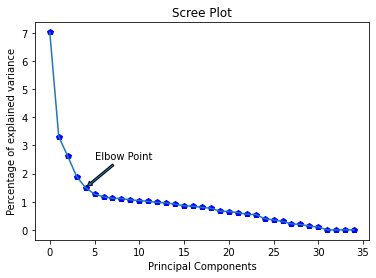

In [63]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate('Elbow Point', xy=(4,1.5), xytext=(5, 2.5), arrowprops=dict(arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

In [64]:
# It can be observed that, after the elbow point, principal components do not contribute much to the variance in the data. 
# That means, we can choose eigenvectors corresponding to first five eigenvalues as principal components 

In [65]:
#4.6 Calculate Principal Components

In [66]:
eigenvector = eig_vec[:,0:5] #Make sure you have chosen the correct eigen vectors corresponding to the chosen eigen values

eigenvector

array([[-0.15734148, -0.0814686 , -0.22587062, -0.10722212, -0.00752845],
       [-0.10597576, -0.04682612, -0.26517756,  0.01500761, -0.00786312],
       [-0.25598505,  0.25193829,  0.22644764,  0.03246855,  0.04820808],
       [-0.23277906,  0.15445072,  0.2753199 ,  0.01428159,  0.26832427],
       [-0.1912835 , -0.00691731, -0.04663417,  0.02642127, -0.07848375],
       [-0.14599174,  0.21408979, -0.34881371,  0.2640932 ,  0.14572962],
       [ 0.00973451,  0.03635902, -0.17643327,  0.08698812, -0.03447938],
       [-0.10716365, -0.12447427,  0.17122358, -0.56562785, -0.04965918],
       [-0.25613609,  0.11057602, -0.25506258, -0.26315384,  0.08881146],
       [-0.25253012,  0.03831097, -0.30414927, -0.28994057,  0.09159884],
       [-0.12387082, -0.38214632,  0.18281738,  0.33480834, -0.02535135],
       [ 0.02405102, -0.14573334, -0.06296919, -0.03670041,  0.18515617],
       [-0.28645931, -0.30275762, -0.07771394,  0.06143218,  0.06346053],
       [-0.08222127,  0.23681672, -0.2

In [67]:
#Generate a new dataset of reduced dimensions by multiplying standardize data and set of eigenvectors
# take the dot product of 'df_num_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
df_pca = pd.DataFrame(df_num_std.dot(eigenvector), columns= ['PC1','PC2','PC3','PC4','PC5']) #Dot product df_num_std.dot(eigenvector)

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.571468,0.233699,1.586585,2.219473,0.715615
1,-0.199890,0.835867,-1.050234,-0.097077,-0.627275
2,-1.740971,0.251788,1.391157,1.637273,0.046151
3,1.470652,-1.877190,-1.515307,0.180157,-1.837106
4,-4.216754,-1.116376,0.533713,1.621483,-0.334647


In [68]:
# checking shape of new data
df_pca.shape

(1460, 5)

In [69]:
#  In the above output, we obtained the data with reduced dimensions. The new dataset has 1460 observations and 5 columns, i.e. we have decreased the number of numerical features from 35 to 5

# Now, we will use the in-built python function from sci-kit learn library to compute principal components


In [70]:
# 5. PCA using sklearn
# Use the in-built PCA function from the sklearn library to perform PCA and check the results with the obtained data with reduced dimensions (using scratch method) 

In [72]:
from sklearn.decomposition import PCA
# specify required no of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=5, random_state=0) #PCA is the imported class, pca is the object of PCA

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [73]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.571352,-0.240622,-1.586777,-2.241474,0.753565
1,0.199709,-0.835527,1.042285,0.089567,-0.634687
2,1.741028,-0.250540,-1.389540,-1.627933,0.038217
3,-1.470503,1.871470,1.526313,-0.195221,-1.759654
4,4.216874,1.125024,-0.532845,-1.588267,-0.391245


In [74]:
# Here, we have used the in-built PCA function to perform dimension reduction and obtained the new dataset with 5 dimensions
# Image 	
# The signs of the first four principal components are reversed in the output obtained from the in-built function, as compared to the results obtained from scratch.

# The signs depend on how the algorithm solves the eigenvector problem underlying the PCA operation. The scratch method is using the eigendecomposition method to compute eigenvalues and eigenvectors; while in-built function uses the SVD method.
# The difference in the signs does not affect the variances explained by the principal components. Let, PC1 be the component of maximum variation. If we consider -(PC1) instead of PC1, then also we will obtain the same variance in the data

# 6. Conclusion

# We have performed the PCA technique using the in-built function as well as from scratch and have reduced the dimension of the numerical variables from 35 to 5. The obtained principal components explains most of the variance in the data without losing much information.
